In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
#train_data = pd.read_csv("train.csv")
#pickle.dump(train_data,open("train_csv.pkl","wb" ))

In [2]:
cross=open('train_csv.pkl','rb')
train_data=pickle.load(cross)

In [3]:
train_data.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [5]:
train_data.columns

Index(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'insfg', 'iterm', 'locdt',
       'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'txkey'],
      dtype='object')

In [6]:
df=train_data.reindex(columns=['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'etymd',
                               'flbmk', 'flg_3dsmk','hcefg', 'insfg', 'iterm', 'locdt',
                               'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'txkey','fraud_ind', ])

In [7]:
np.shape(df)

(1521787, 22)

In [10]:
df.iloc[0]

acqic          6881
bacno        113261
cano          38038
conam         513.8
contp             5
csmcu             0
etymd             0
flbmk             N
flg_3dsmk         N
hcefg             5
insfg             N
iterm             0
locdt            33
loctm        172652
mcc             457
mchno         59333
ovrlt             N
scity             0
stocn           102
stscd             0
txkey        516056
fraud_ind         0
Name: 0, dtype: object

In [30]:
X_train_no_str=df[['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu','etymd',
                   'hcefg', 'iterm', 'locdt',
                   'loctm', 'mcc', 'mchno', 'scity', 'stocn', 'stscd', 'txkey','fraud_ind']]
dataset=np.array(X_train_no_str)

In [36]:
#train_data 標記為1的比例
a=0
for i in range(1521787):
    if X_train_no_str[i,17]==1:
        a+=1
print(a)
print(a/1521787)

20355
0.013375722095142093


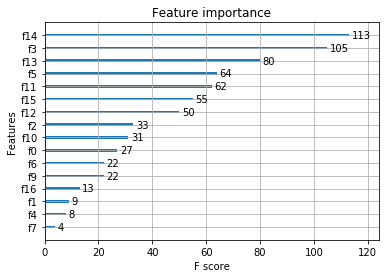

In [69]:
#約10分鐘，找重要變數
import xgboost as xgb
from numpy import loadtxt 
from xgboost import XGBClassifier 
from xgboost import plot_importance 
from matplotlib import pyplot 
import warnings 
warnings.filterwarnings("ignore")  
# 資料集劃分特徵矩陣X和目標變數y 
XX = dataset[:,0:17] 
yy = dataset[:,17] 
# 全量資料集訓練模型 
model = XGBClassifier() 
model.fit(XX,yy) 
# 變數重要性視覺化 
plot_importance(model)
pyplot.show()

In [23]:
#'stocn':f14
#'conam':f3
#'scity':f13
X_tr=df[['stocn','conam','scity','fraud_ind']]

In [37]:
p=X_tr[X_tr['fraud_ind']==0]
q=X_tr[X_tr['fraud_ind']==1]

In [39]:
np.shape(p)[0],np.shape(q)[0]

(1501432, 20355)

In [40]:
X_train_0=p.sample(n=1000)
X_train_1=q.sample(n=1000)

In [42]:
re_X_train = pd.concat([X_train_0,X_train_1], axis=0, ignore_index=True)

In [43]:
re_X_train

,stocn,conam,scity,fraud_ind
0,102,592.25,2310,0
1,102,683.25,5817,0
2,102,603.88,5817,0
3,102,513.80,0,0
4,102,851.64,6023,0
5,102,134.50,5817,0
6,20,305.46,379,0
7,102,794.54,5817,0
8,102,513.80,5817,0
9,102,229.88,5817,0


In [44]:
ar_re_xtr=np.array(re_X_train)
X=ar_re_xtr[:,0:3]
y=ar_re_xtr[:,3]

In [47]:
from sklearn import svm

import time
tStart = time.time()
svc_model = svm.SVC(kernel='linear')
svc_model.fit(X,y)
tEnd = time.time()

print (tEnd - tStart)

1652.501885175705


In [48]:
test_data = pd.read_csv("test.csv")

In [49]:
np.shape(test_data)

(421665, 22)

In [50]:
X_test=test_data[['stocn','conam','scity']]

In [51]:
fi=svc_model.predict(X_test)

In [53]:
len(fi)

421665

In [55]:
k=0
for i in range(421665):
    if fi[i]==1:
        k+=1
print(k)
print(k/421665)

43817
0.10391424472033486


In [57]:
k=0
for i in range(421665):
    if fi[i]==1:
        print(i)

23
26
28
29
48
61
75
77
83
86
110
111
120
121
123
127
131
136
139
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
199
200
201
202
203
204
205
206
207
208
209
210
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
258
269
280
284
285
287
288
292
296
297
298
299
300
301
302
305
306
308
310
312
313
314
315
316
319
320
322
323
338
339
340
341
342
343
344
345
346
347
348
349
356
359
361
362
364
365
370
391
408
411
413
414
416
417
418
419
420
421
423
425
426
427
428
433
436
437
442
448
451
454
464
471
472
481
482
491
497
511
523
541
543
552
554
555
557
559
565
568
570
572
574
576
577
578
579
581
582
583
584
585
586
603
614
616
623
625
626
627
629
634
642
657
666
673
675
678
689
692
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
713
714
715
716
717
718
719
720
721
723
724
725
72

5027
5053
5054
5056
5057
5061
5065
5067
5070
5071
5072
5075
5079
5080
5083
5085
5087
5089
5092
5094
5095
5096
5108
5109
5111
5126
5127
5129
5131
5133
5134
5138
5141
5142
5145
5146
5153
5155
5162
5199
5203
5209
5215
5233
5242
5244
5245
5246
5306
5307
5315
5322
5326
5327
5328
5337
5338
5339
5343
5344
5345
5346
5347
5348
5349
5350
5352
5364
5365
5366
5367
5368
5369
5371
5372
5373
5415
5423
5424
5428
5434
5435
5436
5437
5439
5441
5442
5443
5453
5480
5481
5488
5489
5490
5491
5497
5499
5507
5508
5509
5510
5511
5513
5516
5521
5522
5523
5526
5527
5528
5529
5531
5532
5604
5609
5616
5622
5627
5629
5637
5639
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5669
5670
5671
5672
5673
5675
5676
5679
5680
5681
5690
5693
5701
5704
5710
5713
5743
5754
5756
5758
5774
5778
5781
5782
5783
5785
5786
5790
5843
5844
5845
5847
5849
5850
5851
5860
5862
5864
5865
5866
5871
5878
5880
5881
5886
5892
5896
5900
5904
5910
5913
5914


13008
13013
13024
13039
13041
13045
13046
13051
13052
13053
13057
13061
13062
13064
13066
13070
13072
13073
13074
13075
13076
13085
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13102
13103
13104
13105
13109
13110
13112
13113
13117
13118
13121
13122
13123
13125
13126
13127
13128
13138
13140
13141
13142
13144
13145
13146
13147
13150
13152
13154
13156
13157
13158
13173
13174
13179
13180
13182
13185
13186
13187
13189
13190
13191
13192
13195
13196
13207
13209
13210
13211
13212
13213
13214
13215
13216
13219
13222
13232
13235
13236
13240
13247
13249
13250
13251
13253
13254
13255
13256
13257
13258
13259
13260
13261
13263
13264
13265
13266
13267
13268
13269
13270
13271
13272
13274
13275
13276
13277
13284
13285
13287
13296
13297
13316
13317
13319
13321
13333
13334
13335
13339
13347
13352
13358
13359
13361
13367
13371
13373
13375
13379
13385
13386
13389
13394
13397
13406
13407
13409
13410
13411
13414
13415
13417
13418
13420
13421
13423
13424
13426
13427
13428
13431
1343

18648
18649
18650
18651
18652
18654
18656
18657
18658
18660
18663
18664
18665
18669
18670
18672
18680
18681
18684
18687
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18710
18722
18732
18740
18762
18767
18769
18770
18771
18778
18782
18784
18785
18800
18801
18802
18804
18805
18817
18831
18832
18833
18834
18835
18836
18838
18840
18846
18862
18867
18868
18869
18870
18871
18873
18874
18890
18894
18896
18902
18935
18950
18953
18959
18963
18964
18971
18972
18982
18989
18991
18993
18994
18995
18996
18998
19000
19001
19002
19003
19005
19006
19007
19008
19009
19010
19012
19013
19014
19015
19016
19017
19019
19041
19043
19045
19046
19048
19049
19050
19051
19053
19054
19056
19057
19058
19060
19061
19062
19063
19064
19065
19066
19068
19069
19070
19071
19072
19073
19074
19075
19076
19077
19078
19079
19088
19090
19091
19092
19093
19094
19095
19096
19097
19098
19099
19100
19112
19113
19122
19127
19131
19132
19133
19136
19137
19138
19140
19141
19143
19146
19148
19149
19154
19156
1917

24931
24972
24980
24988
24993
24995
24997
25003
25010
25013
25035
25042
25043
25044
25047
25048
25049
25050
25057
25058
25063
25071
25072
25073
25074
25078
25079
25086
25090
25091
25116
25126
25127
25131
25138
25139
25143
25155
25156
25158
25160
25161
25162
25163
25164
25177
25180
25186
25197
25198
25205
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25224
25225
25226
25227
25228
25231
25232
25233
25234
25235
25236
25237
25238
25239
25260
25261
25277
25284
25286
25287
25288
25289
25292
25293
25294
25297
25308
25354
25361
25374
25382
25383
25389
25390
25395
25411
25419
25426
25434
25437
25441
25458
25465
25471
25478
25480
25485
25496
25497
25503
25511
25512
25517
25523
25527
25528
25532
25536
25541
25561
25562
25617
25619
25621
25622
25626
25630
25631
25632
25633
25637
25642
25644
25645
25661
25662
25666
25670
25692
25694
25701
25712
25720
25731
25740
25744
25759
25767
25779
25793
25798
25810
25819
25824
25825
25834
25835
25866
25877
25878
25880
25884
25885
25889
25890
2589

32600
32608
32623
32627
32628
32630
32631
32636
32637
32640
32641
32654
32662
32665
32667
32668
32669
32670
32671
32672
32675
32676
32677
32679
32682
32683
32684
32687
32690
32692
32694
32699
32700
32701
32703
32704
32718
32721
32728
32730
32735
32740
32743
32746
32750
32752
32754
32757
32758
32759
32763
32765
32766
32785
32789
32796
32799
32800
32801
32823
32829
32832
32850
32861
32876
32881
32886
32888
32889
32897
32915
32928
32935
32939
32945
32948
32953
32960
32970
32971
32972
32977
32978
32982
32985
32989
32990
32992
32999
33000
33003
33005
33006
33007
33008
33012
33017
33025
33028
33031
33034
33038
33040
33041
33043
33047
33052
33053
33054
33055
33059
33061
33066
33070
33081
33096
33098
33099
33105
33106
33107
33108
33113
33117
33123
33135
33140
33150
33151
33163
33165
33167
33178
33183
33186
33187
33190
33210
33212
33214
33215
33250
33262
33263
33275
33276
33301
33308
33317
33318
33322
33324
33325
33336
33341
33352
33353
33354
33355
33357
33358
33359
33370
33376
33399
33401
3340

41709
41710
41711
41716
41722
41772
41780
41789
41791
41801
41803
41809
41848
41877
41949
41958
41962
41963
41966
41967
41971
41976
42009
42016
42043
42077
42078
42080
42082
42085
42086
42087
42092
42093
42095
42097
42098
42100
42102
42104
42105
42106
42108
42109
42111
42113
42116
42151
42156
42161
42180
42190
42282
42284
42285
42286
42287
42288
42289
42297
42298
42299
42319
42320
42372
42452
42453
42454
42495
42523
42524
42525
42526
42552
42553
42554
42580
42584
42586
42708
42718
42855
42918
42924
42958
42996
43038
43040
43044
43045
43064
43065
43066
43067
43068
43069
43070
43071
43072
43073
43074
43075
43082
43093
43097
43098
43099
43100
43115
43116
43117
43118
43141
43157
43163
43225
43227
43228
43265
43266
43267
43282
43283
43316
43397
43404
43410
43474
43477
43497
43498
43499
43535
43540
43546
43594
43634
43692
43693
43760
43763
43765
43771
43829
43861
43862
43865
43867
43875
43896
43901
43905
43934
43992
43996
44099
44100
44101
44102
44103
44104
44105
44106
44107
44108
44109
4411

59272
59276
59279
59280
59282
59287
59292
59297
59298
59299
59300
59302
59306
59307
59309
59326
59328
59329
59330
59332
59333
59334
59335
59336
59339
59340
59341
59343
59344
59345
59346
59428
59434
59435
59438
59440
59441
59556
59574
59575
59576
59577
59578
59579
59581
59582
59584
59586
59672
59684
59685
59686
59687
59688
59689
59691
59692
59693
59694
59695
59696
59697
59698
59699
59701
59702
59704
59750
59756
59778
59779
59782
59819
59831
59836
59845
59849
59870
59894
59979
60006
60007
60014
60015
60042
60046
60149
60150
60151
60152
60153
60190
60195
60201
60210
60214
60217
60257
60258
60259
60260
60296
60297
60298
60300
60301
60303
60304
60338
60377
60429
60454
60469
60470
60480
60484
60486
60487
60488
60493
60494
60499
60509
60514
60616
60617
60618
60628
60629
60631
60632
60667
60678
60684
60686
60693
60812
60860
60866
60870
60872
60914
60917
60946
60972
61046
61075
61076
61104
61105
61140
61150
61169
61175
61206
61313
61332
61361
61417
61419
61507
61515
61516
61545
61556
61611
6161

75760
75761
75762
75763
75764
75765
75766
75767
75768
75770
75813
75870
75871
75872
75873
75874
75875
75876
75877
75878
75880
75881
75882
75885
75886
75887
75925
75928
75947
75990
76017
76018
76019
76020
76021
76022
76023
76024
76025
76026
76027
76028
76029
76030
76031
76032
76149
76151
76152
76193
76209
76211
76212
76235
76296
76297
76298
76299
76302
76304
76306
76353
76354
76355
76356
76358
76359
76360
76361
76362
76363
76364
76365
76366
76367
76368
76369
76391
76392
76411
76413
76422
76423
76425
76426
76427
76429
76434
76495
76499
76502
76508
76510
76515
76519
76533
76536
76539
76541
76542
76543
76544
76546
76547
76548
76556
76557
76558
76559
76560
76561
76562
76563
76564
76565
76567
76568
76569
76570
76571
76572
76573
76574
76575
76576
76577
76586
76588
76589
76590
76591
76592
76593
76594
76595
76596
76597
76598
76599
76600
76602
76603
76604
76605
76606
76607
76608
76609
76610
76635
76637
76640
76642
76673
76675
76781
76782
76783
76784
76825
76863
76864
76884
76885
76897
76931
7693

91152
91153
91154
91155
91156
91157
91230
91231
91232
91233
91234
91235
91236
91237
91238
91239
91240
91241
91242
91243
91244
91245
91246
91247
91259
91260
91261
91262
91266
91267
91268
91280
91391
91398
91399
91400
91402
91403
91404
91409
91410
91411
91412
91414
91415
91417
91419
91420
91422
91423
91452
91453
91454
91455
91472
91473
91474
91476
91477
91481
91492
91503
91511
91533
91552
91617
91621
91624
91625
91696
91797
91800
91801
91802
91803
91804
91807
91809
91810
91811
91812
91813
91814
91870
91878
91879
91880
91881
91882
91883
91884
91885
91886
91887
91888
91889
91891
91893
91894
91895
91897
91899
91900
91902
91903
91904
91905
91906
91907
91908
91909
91910
91926
91928
91939
91954
91955
91956
91957
91958
91959
91960
91961
91962
91963
91964
92008
92071
92174
92175
92177
92179
92180
92181
92182
92183
92184
92185
92186
92187
92189
92190
92191
92192
92193
92194
92195
92196
92197
92198
92199
92200
92202
92203
92205
92206
92207
92208
92210
92211
92212
92213
92214
92216
92217
92218
9221

107604
107609
107647
107653
107659
107762
107779
107780
107807
107808
107809
107817
107822
107825
107850
107853
107908
107909
107910
107911
107912
107913
107914
107915
107916
107917
107918
107919
107920
107921
107922
107923
107924
107925
107926
107927
107928
107929
107930
107931
107932
107933
107934
107935
107936
107937
107938
107939
107940
107941
107942
107943
107944
107945
107946
107947
107948
107949
107950
107951
107952
107953
107954
107955
107956
107957
107958
107959
107960
107961
107962
107963
107964
107965
107966
107967
107968
107969
107970
107971
107972
107973
107974
107975
107976
107977
107978
107979
107980
107981
107982
107983
107984
107985
107986
107987
107988
107989
107990
107991
107992
107993
107994
107995
107996
107997
107998
107999
108000
108001
108002
108003
108004
108005
108006
108007
108008
108009
108010
108011
108012
108013
108014
108015
108016
108017
108018
108019
108020
108021
108022
108023
108024
108025
108026
108027
108028
108029
108030
108031
108032
108033
108034

122726
122732
122736
122763
122784
122785
122788
122815
122830
122877
122879
122889
122894
122895
122901
122904
122942
122977
122978
122979
122987
122999
123007
123008
123009
123010
123011
123012
123028
123033
123036
123037
123039
123089
123093
123100
123126
123141
123223
123251
123254
123261
123265
123268
123272
123277
123443
123527
123531
123564
123567
123570
123582
123583
123584
123588
123598
123619
123727
123742
123745
123796
123872
123905
123937
123938
123945
123946
123986
123987
123988
123989
124006
124050
124059
124060
124087
124089
124090
124107
124109
124111
124120
124121
124122
124127
124130
124138
124146
124149
124156
124158
124161
124163
124176
124177
124180
124186
124190
124199
124200
124201
124238
124239
124240
124241
124243
124313
124348
124386
124387
124389
124564
124565
124566
124567
124568
124569
124571
124572
124573
124574
124576
124577
124578
124579
124581
124586
124587
124588
124589
124590
124596
124640
124641
124642
124643
124660
124755
124759
124776
124777
124781

141696
141697
141701
141704
141705
141707
141708
141710
141722
141724
141732
141785
141786
141796
141798
141839
141858
141874
141878
141879
141881
141885
141886
141887
141962
142031
142033
142067
142224
142225
142226
142228
142229
142244
142246
142248
142256
142257
142277
142281
142306
142316
142317
142319
142320
142322
142329
142330
142332
142339
142368
142378
142381
142382
142383
142386
142390
142391
142398
142399
142401
142459
142481
142482
142483
142484
142485
142486
142487
142488
142489
142490
142491
142492
142493
142494
142495
142496
142497
142499
142500
142502
142508
142538
142540
142575
142577
142612
142618
142620
142621
142622
142666
142669
142670
142675
142676
142677
142679
142743
142801
142802
142808
142868
142876
142880
142883
142884
142919
142941
142942
142943
142944
142945
142946
142947
142948
142949
142950
142951
142952
142953
142954
142955
142956
142957
142958
142959
142960
142961
142962
142963
142964
142965
142966
142967
142968
142969
142970
142971
142972
142973
142974

159547
159548
159549
159551
159552
159553
159554
159555
159556
159557
159558
159559
159560
159561
159562
159563
159564
159565
159566
159567
159568
159569
159570
159571
159572
159573
159574
159575
159576
159577
159578
159579
159580
159581
159582
159583
159584
159585
159586
159587
159588
159589
159590
159591
159592
159593
159594
159595
159596
159597
159598
159599
159600
159601
159602
159603
159604
159605
159606
159607
159608
159609
159610
159611
159612
159613
159614
159616
159617
159618
159619
159620
159621
159622
159623
159653
159669
159716
159717
159719
159721
159731
159755
159770
159795
159796
159798
159799
159801
159802
159804
159806
159932
160032
160045
160080
160118
160156
160157
160194
160195
160196
160229
160261
160263
160296
160311
160315
160340
160344
160345
160348
160349
160350
160351
160352
160353
160361
160377
160379
160380
160381
160395
160416
160417
160451
160548
160549
160550
160563
160564
160565
160638
160647
160672
160678
160691
160692
160693
160694
160695
160696
160697

176369
176371
176374
176387
176394
176420
176450
176452
176453
176511
176534
176540
176541
176570
176602
176642
176643
176644
176645
176646
176647
176648
176652
176695
176699
176783
176815
176816
176821
176822
176823
176824
176825
176826
176827
176828
176829
176830
176831
176832
176839
176840
176841
176983
176991
177026
177034
177035
177036
177062
177065
177070
177072
177122
177127
177167
177168
177202
177203
177204
177207
177240
177241
177242
177243
177244
177245
177246
177247
177248
177249
177250
177251
177252
177253
177254
177255
177256
177257
177258
177259
177260
177261
177262
177263
177264
177265
177266
177354
177402
177404
177451
177517
177538
177580
177636
177637
177766
177767
177768
177769
177788
177789
177790
177793
177794
177799
177811
177833
177874
177897
177898
177899
177904
177918
177989
178032
178037
178044
178045
178183
178189
178190
178193
178214
178231
178232
178233
178234
178237
178243
178265
178277
178326
178380
178388
178442
178443
178444
178445
178446
178447
178450

196375
196377
196378
196380
196381
196383
196384
196385
196386
196388
196389
196390
196391
196393
196394
196395
196396
196398
196399
196400
196401
196402
196403
196404
196405
196409
196411
196412
196413
196414
196415
196416
196417
196419
196420
196421
196424
196466
196508
196517
196571
196574
196677
196678
196795
196796
196797
196798
196799
196800
196801
196802
196803
196804
196805
196807
196808
196820
196821
196822
196823
196824
196825
196856
196945
196947
196948
196950
196951
196952
196953
196954
196955
196956
196957
196958
197025
197026
197027
197028
197078
197081
197083
197085
197086
197136
197183
197187
197189
197190
197192
197195
197196
197197
197228
197298
197303
197337
197341
197344
197345
197348
197351
197390
197391
197392
197394
197395
197397
197398
197403
197428
197475
197506
197507
197509
197511
197517
197557
197620
197621
197622
197643
197644
197646
197647
197648
197650
197651
197653
197655
197656
197676
197677
197678
197679
197697
197727
197731
197732
197745
197768
197770

212236
212238
212254
212257
212259
212277
212304
212323
212334
212386
212396
212402
212443
212500
212545
212550
212551
212552
212553
212555
212579
212580
212581
212613
212639
212660
212681
212781
212784
212815
212826
212828
212829
212830
212831
212833
212834
212835
212836
212837
212838
212839
212840
212841
212842
212843
212844
212845
212846
212847
212848
212849
212984
212985
212990
212991
212993
213004
213038
213045
213048
213055
213060
213061
213063
213074
213076
213112
213118
213122
213128
213135
213136
213153
213157
213191
213192
213194
213195
213212
213220
213245
213256
213262
213263
213364
213396
213405
213406
213408
213411
213412
213424
213435
213467
213468
213469
213485
213502
213505
213565
213567
213569
213573
213597
213692
213693
213694
213695
213696
213726
213744
213745
213746
213747
213749
213750
213771
213773
213776
213780
213781
213782
213783
213784
213785
213786
213787
213788
213789
213791
213792
213793
213794
213795
213797
213798
213799
213800
213801
213802
213804
213897

226765
226835
226937
226941
226947
226949
226950
226970
226976
226978
226979
227037
227040
227041
227053
227054
227063
227067
227069
227113
227115
227136
227137
227138
227156
227157
227158
227179
227182
227230
227231
227233
227296
227333
227334
227341
227344
227377
227379
227381
227420
227483
227484
227488
227499
227501
227504
227506
227507
227509
227582
227585
227611
227613
227614
227615
227616
227647
227715
227716
227717
227718
227719
227720
227721
227723
227814
227815
227816
227817
227818
227820
227856
227928
227961
227963
228028
228051
228052
228053
228054
228057
228066
228067
228087
228099
228100
228110
228140
228141
228142
228143
228144
228145
228146
228197
228217
228218
228219
228221
228223
228224
228227
228229
228233
228237
228288
228289
228317
228319
228321
228322
228324
228325
228326
228327
228328
228329
228330
228331
228332
228333
228385
228431
228432
228436
228462
228465
228468
228469
228475
228477
228478
228480
228484
228485
228486
228487
228488
228489
228490
228491
228492

243338
243340
243350
243353
243362
243363
243370
243373
243509
243510
243511
243512
243513
243514
243515
243516
243517
243518
243519
243520
243521
243522
243523
243524
243525
243562
243628
243668
243670
243724
243725
243798
243860
243907
243937
243943
243946
243947
243997
244111
244124
244126
244127
244130
244132
244136
244140
244154
244168
244173
244178
244182
244183
244184
244203
244220
244225
244241
244242
244243
244251
244254
244258
244275
244338
244339
244340
244342
244352
244354
244358
244360
244365
244366
244368
244429
244433
244437
244438
244439
244440
244441
244442
244443
244444
244445
244446
244447
244448
244449
244450
244451
244452
244453
244454
244455
244456
244457
244458
244459
244460
244461
244462
244463
244464
244465
244466
244467
244468
244469
244471
244472
244473
244474
244475
244476
244477
244478
244479
244480
244573
244579
244580
244581
244583
244585
244586
244636
244637
244638
244640
244641
244642
244643
244644
244666
244668
244670
244725
244726
244775
244776
244777

258326
258330
258374
258382
258386
258481
258512
258514
258515
258522
258523
258524
258526
258533
258545
258558
258568
258569
258571
258572
258573
258574
258576
258577
258578
258579
258582
258584
258586
258590
258592
258593
258594
258595
258598
258599
258602
258603
258604
258605
258607
258608
258609
258611
258657
258661
258679
258708
258781
258784
258910
258916
258932
258936
259027
259039
259102
259104
259105
259107
259109
259131
259133
259135
259137
259154
259156
259323
259333
259365
259370
259371
259437
259438
259455
259507
259515
259528
259529
259534
259579
259580
259600
259629
259637
259687
259689
259696
259698
259820
259821
259822
259823
259825
259826
259827
259828
259829
259830
259831
259832
259833
259834
259835
259836
259837
259838
259839
259840
259841
259842
259843
259844
259845
259846
259847
259848
259849
259900
259912
259913
259914
259915
259916
259917
259918
259919
259924
260068
260072
260076
260077
260087
260147
260148
260296
260302
260305
260306
260307
260311
260334
260335

277863
277864
277872
277873
277874
277875
277876
277877
277878
277889
277919
277921
277922
277923
277924
277925
277926
277927
277928
277929
277930
277932
277933
277935
277936
277974
277975
277979
277980
277982
277983
277985
277988
277990
277992
277993
277995
278074
278076
278077
278081
278124
278218
278221
278224
278239
278246
278247
278248
278249
278250
278251
278252
278253
278254
278255
278256
278257
278258
278259
278260
278261
278262
278263
278264
278265
278266
278267
278268
278269
278270
278271
278272
278273
278274
278275
278276
278289
278291
278385
278389
278415
278434
278438
278441
278442
278449
278453
278454
278455
278456
278458
278459
278460
278461
278462
278465
278469
278478
278480
278481
278486
278499
278512
278513
278516
278561
278661
278662
278670
278695
278708
278719
278720
278721
278722
278743
278747
278748
278749
278750
278751
278753
278766
278769
278832
278836
278886
278887
278889
278891
278974
278979
278984
278985
278986
278987
278988
278989
279035
279190
279227
279247

293916
293935
293939
293986
293991
294000
294024
294025
294028
294029
294031
294034
294055
294064
294109
294110
294111
294112
294114
294115
294125
294127
294128
294129
294130
294131
294133
294158
294162
294181
294183
294184
294500
294536
294556
294558
294559
294560
294561
294562
294583
294682
294733
294771
294773
294775
294776
294844
294849
294850
294877
294878
294879
294880
294922
294923
294925
294927
294935
294979
294980
294981
294994
295037
295039
295076
295077
295078
295079
295080
295081
295082
295083
295084
295085
295086
295087
295088
295090
295092
295095
295096
295097
295098
295115
295118
295119
295120
295122
295126
295131
295149
295156
295159
295166
295167
295174
295177
295226
295227
295230
295257
295296
295297
295299
295300
295301
295302
295303
295305
295329
295343
295379
295497
295510
295535
295589
295591
295599
295600
295601
295621
295697
295700
295705
295715
295735
295748
295749
295754
295755
295757
295758
295764
295765
295768
295769
295782
295832
295833
295834
295835
295836

314361
314362
314370
314409
314428
314429
314430
314431
314432
314433
314434
314435
314436
314437
314438
314441
314444
314445
314447
314457
314458
314460
314464
314465
314523
314524
314525
314575
314591
314607
314640
314644
314652
314768
314769
314770
314771
314773
314774
314775
314777
314778
314779
314780
314781
314782
314783
314784
314785
314786
314817
314825
314871
314884
314885
314887
314905
314908
314930
314933
314934
314936
314941
314942
314943
314945
314947
314949
314962
314979
314984
314990
315001
315075
315189
315190
315193
315195
315197
315198
315209
315214
315258
315261
315313
315325
315326
315327
315328
315329
315337
315343
315347
315350
315351
315381
315382
315383
315384
315395
315432
315446
315476
315497
315498
315501
315503
315505
315547
315548
315554
315555
315556
315557
315558
315561
315562
315660
315675
315701
315726
315752
315759
315784
315786
315790
315792
315947
315953
315966
315971
315972
315974
315975
315976
315977
315980
315981
315987
315990
315991
315992
315997

328498
328501
328544
328545
328546
328618
328620
328636
328683
328724
328737
328778
328780
328781
328783
328784
328786
328796
328812
328815
328817
328854
328862
328866
328868
328916
328919
328921
328937
329098
329103
329107
329111
329114
329124
329130
329134
329135
329136
329139
329140
329156
329162
329163
329195
329200
329205
329212
329214
329240
329259
329369
329377
329414
329415
329417
329434
329465
329614
329674
329676
329677
329678
329679
329680
329681
329682
329683
329685
329724
329725
329728
329836
329844
329846
329847
329865
329867
329991
329992
329993
330025
330029
330033
330093
330095
330096
330097
330098
330099
330118
330121
330124
330148
330179
330194
330195
330200
330201
330202
330203
330204
330206
330207
330208
330209
330212
330213
330214
330215
330216
330219
330222
330223
330224
330227
330228
330229
330231
330232
330233
330234
330235
330237
330239
330240
330241
330242
330270
330299
330302
330305
330306
330313
330352
330364
330371
330384
330385
330411
330414
330441
330442

346783
346820
346821
346827
346859
346860
346861
346862
346865
346867
346869
346874
346875
346898
346913
346914
346915
346931
346946
346950
347037
347038
347039
347040
347099
347100
347105
347106
347168
347177
347204
347313
347315
347335
347336
347339
347341
347344
347351
347394
347399
347500
347501
347502
347503
347521
347538
347708
347709
347712
347713
347730
347762
347763
347764
347766
347767
347768
347769
347770
347771
347772
347773
347774
347777
347780
347781
347800
347802
347803
347818
347822
347828
347837
347851
347864
347910
347917
347918
347920
347923
347924
347944
347946
347947
347976
347977
347978
347979
348034
348067
348068
348069
348070
348152
348153
348158
348160
348173
348213
348232
348237
348256
348257
348258
348304
348332
348333
348336
348337
348338
348339
348341
348343
348344
348346
348351
348487
348504
348505
348506
348507
348508
348512
348513
348520
348524
348526
348527
348531
348535
348536
348567
348617
348623
348636
348640
348642
348644
348645
348646
348650
348655

362318
362324
362327
362330
362349
362404
362463
362464
362493
362498
362499
362500
362501
362502
362570
362615
362617
362748
362750
362795
362832
362868
362889
362901
362904
362932
362953
362977
362997
363034
363039
363043
363048
363050
363062
363081
363087
363135
363136
363137
363138
363142
363146
363148
363149
363154
363160
363164
363168
363174
363178
363179
363193
363194
363195
363199
363208
363212
363237
363238
363242
363245
363278
363341
363464
363477
363479
363480
363481
363482
363483
363484
363485
363486
363487
363488
363576
363578
363580
363581
363583
363650
363653
363657
363658
363660
363661
363662
363664
363665
363668
363674
363742
363758
363768
363769
363842
363843
363844
363845
363867
363869
363946
363950
364027
364028
364125
364129
364130
364132
364133
364134
364139
364156
364157
364158
364160
364214
364484
364487
364491
364496
364499
364500
364504
364510
364622
364627
364630
364635
364637
364640
364641
364682
364686
364688
364699
364711
364727
364735
364759
364760
364762

379041
379042
379043
379044
379045
379046
379047
379048
379049
379050
379051
379052
379053
379054
379055
379056
379057
379117
379118
379130
379132
379133
379134
379135
379136
379157
379158
379161
379163
379168
379170
379175
379177
379197
379216
379217
379218
379273
379313
379330
379332
379333
379338
379357
379358
379359
379360
379361
379362
379363
379364
379365
379366
379367
379419
379427
379448
379451
379468
379489
379519
379521
379525
379528
379529
379532
379533
379535
379536
379537
379538
379539
379541
379542
379544
379690
379842
379843
379844
379875
379879
379889
379894
379895
379932
379936
379994
380000
380002
380003
380004
380005
380110
380118
380121
380126
380136
380234
380242
380262
380263
380271
380272
380273
380308
380309
380312
380314
380315
380316
380317
380325
380376
380380
380496
380497
380498
380500
380501
380503
380506
380507
380509
380510
380515
380517
380518
380519
380521
380523
380524
380525
380526
380529
380530
380531
380532
380533
380534
380535
380536
380537
380538

395444
395446
395449
395456
395457
395515
395587
395608
395642
395643
395645
395650
395674
395675
395723
395736
395739
395740
395741
395745
395779
395824
395826
395827
395829
395831
395887
395898
395982
395983
395996
395999
396025
396026
396067
396108
396118
396149
396154
396155
396156
396157
396158
396159
396160
396162
396163
396164
396171
396172
396174
396175
396177
396182
396185
396186
396217
396223
396229
396245
396246
396248
396249
396267
396269
396271
396272
396273
396274
396382
396385
396411
396431
396471
396532
396534
396580
396582
396583
396586
396587
396588
396589
396590
396591
396592
396594
396595
396602
396618
396620
396622
396623
396625
396626
396627
396656
396718
396728
396754
396755
396756
396758
396807
396808
396809
396810
396811
396813
396814
396815
396816
396817
396818
396819
396820
396829
396830
396874
396877
396963
396964
396965
396966
396967
396968
396969
396970
396971
396972
396973
396974
396975
396976
396977
396978
396979
396980
396981
396982
396983
396984
396985

407767
407793
407795
407815
407834
407836
407912
407914
407978
407979
407981
408001
408007
408010
408011
408016
408017
408018
408019
408021
408022
408023
408035
408038
408039
408042
408044
408047
408129
408133
408172
408216
408218
408257
408267
408306
408307
408308
408309
408310
408311
408312
408360
408362
408363
408365
408367
408378
408383
408387
408390
408391
408395
408401
408403
408404
408405
408406
408407
408409
408412
408472
408478
408578
408712
408788
408804
408827
408828
408842
408935
408936
408937
408938
408939
408940
408941
408942
408943
408944
408945
408946
408947
408948
408949
408950
408951
408952
408953
408955
408956
408957
408958
408959
408964
408980
408992
409000
409003
409063
409064
409065
409066
409090
409111
409113
409121
409165
409170
409185
409259
409262
409275
409303
409382
409408
409461
409467
409468
409469
409470
409471
409472
409473
409474
409475
409476
409477
409485
409487
409488
409489
409491
409492
409518
409519
409524
409559
409560
409573
409577
409578
409582

In [58]:
kkk=pd.DataFrame(fi)
kkk.rename(columns={kkk.columns[0]:"fraud_ind"}, inplace=True)
kkk

,fraud_ind
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [59]:
idx=test_data[['txkey']]
idx

,txkey
0,592489
1,592452
2,590212
3,590209
4,592488
5,592460
6,590160
7,592453
8,585745
9,592451


In [61]:
result=pd.merge(idx,kkk,left_index=True,right_index=True,how='outer')
result

,txkey,fraud_ind
0,592489,0.0
1,592452,0.0
2,590212,0.0
3,590209,0.0
4,592488,0.0
5,592460,0.0
6,590160,0.0
7,592453,0.0
8,585745,0.0
9,592451,0.0


In [69]:
result.to_csv("output1.csv",index=False,sep=',')